1. Общая выручка магазина: 6260
2. Товар, который был продан наибольшее количество раз: Яйца
3. Товар, который принес наибольшую выручку: Сыр
4. Отчет

4.1. Общая выручка магазина: 6260

4.2. Количество проданных единиц каждого товара:
Молоко: 7
Хлеб: 4
Яйца: 12
Сыр: 9
Яблоки: 5
Масло: 1
Картофель: 10
Морковь: 8
Курица: 2
Рис: 3

4.3. Доля каждого товара в общей выручке:
Молоко 16.77%
Хлеб 6.39%
Яйца 3.83%
Сыр 43.13%
Яблоки 3.99%
Масло 3.19%
Картофель 4.79%
Морковь 5.11%
Курица 7.99%
Рис 4.79%


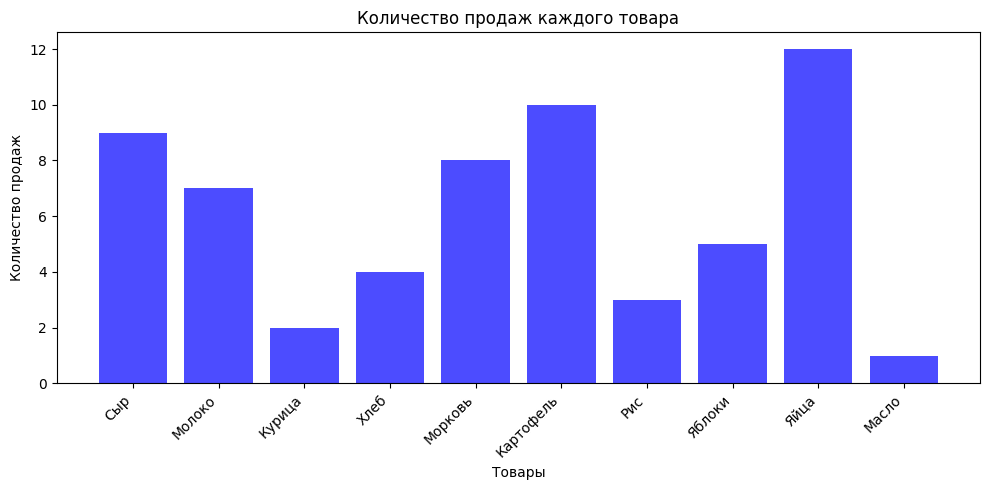

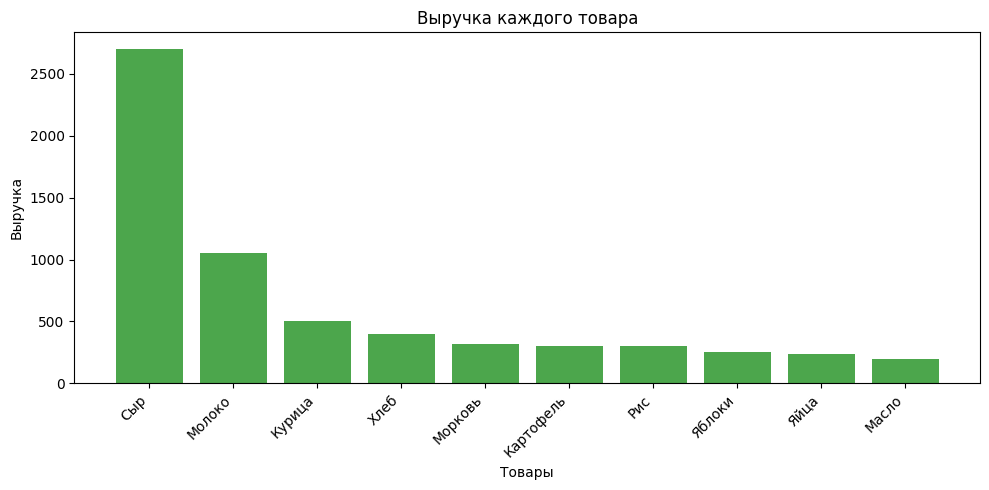

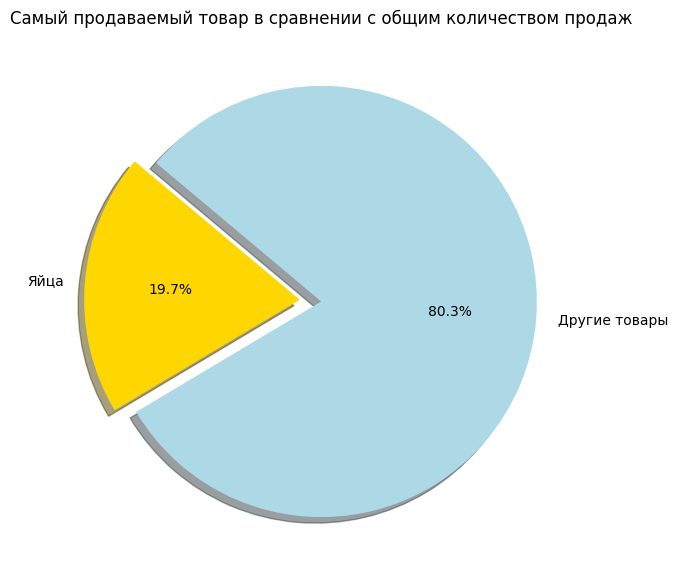

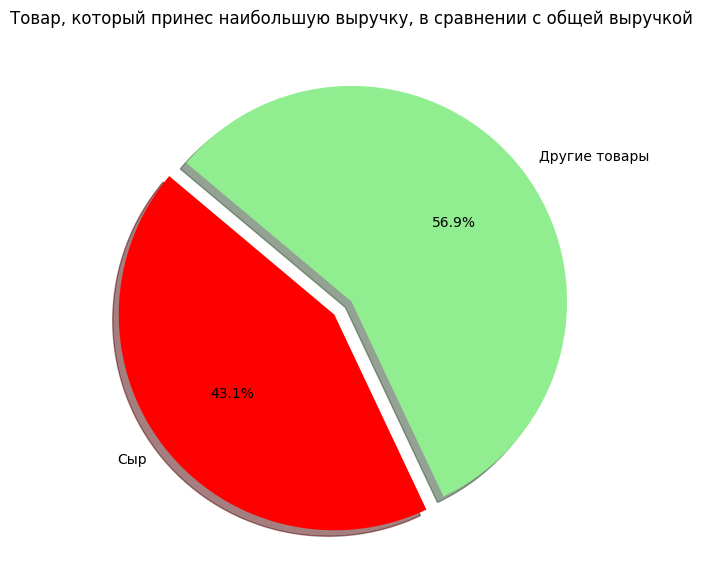

In [2]:
import csv
import matplotlib.pyplot as plt

# Пример данных для записи в CSV файл
data = [
    ['№ заказа', 'Дата заказа', 'Название товара', 'Категория товара', 'Количество продаж', 'Цена за единицу',
     'Общая стоимость'],
    [1, '01.01.2024', 'Молоко', 'Молочные продукты', 7, 150, 1050],
    [2, '02.01.2024', 'Хлеб', 'Хлебобулочные изделия', 4, 100, 400],
    [3, '03.01.2024', 'Яйца', 'Яйца', 12, 20, 240],
    [4, '04.01.2024', 'Сыр', 'Молочные продукты', 9, 300, 2700],
    [5, '05.01.2024', 'Яблоки', 'Фрукты', 5, 50, 250],
    [6, '06.01.2024', 'Масло', 'Молочные продукты', 1, 200, 200],
    [7, '07.01.2024', 'Картофель', 'Овощи', 10, 30, 300],
    [8, '08.01.2024', 'Морковь', 'Овощи', 8, 40, 320],
    [9, '09.01.2024', 'Курица', 'Птица', 2, 250, 500],
    [10, '10.01.2024', 'Рис', 'Крупы', 3, 100, 300]
]

# Запись данных в CSV файл
with open('table.csv', mode='w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in data:
        writer.writerow(row)

# Считываем данные из CSV файла
with open('table.csv', newline='', encoding='utf-8') as csvfile:
    data_from_csv = list(csv.reader(csvfile))

# Общая выручка магазина
data_without_headline = data_from_csv[1:]
total_revenue = sum(int(row[6]) for row in data_without_headline)
print("1. Общая выручка магазина:", total_revenue)

# Подсчитываем количество проданных единиц каждого товара
units_sold = {}
for item in data_without_headline:
    product = item[2]
    if product in units_sold:
        units_sold[product] += int(item[4])
    else:
        units_sold[product] = int(item[4])

# Определяем долю каждого товара в общей выручке
percent_revenue_for_products = [[i[2], ((int(i[-1]) / total_revenue) * 100)] for i in data_without_headline]


# Сначала определим функцию для сортировки выбором
def selection_sort(arr, m):
    n = len(arr)
    for i in range(n):
        max_idx = i
        for j in range(i + 1, n):
            if int(arr[j][m]) > int(arr[max_idx][m]):
                max_idx = j
        arr[i], arr[max_idx] = arr[max_idx], arr[i]
    return arr


# Применяем сортировку выбором к данным
array_1 = selection_sort(data_without_headline, 4)
sort_price_for_item = []
for row_1 in array_1:
    sort_price_for_item.append(row_1)
print("2. Товар, который был продан наибольшее количество раз:", sort_price_for_item[0][2])


# Сначала определим функцию для сортировки бинарным поиском
def binary_search(arr, i):
    if len(arr) == 0:
        return -1
    a = len(arr) // 2
    if i == int(arr[a][6]):
        return arr[a][2]
    if i > int(arr[a][6]):
        return binary_search(arr[:a], i)
    if i < int(arr[a][6]):
        return binary_search(arr[a + 1:], i), arr[a + 1:]


# Применяем сортировку выбора к данным
array_2 = selection_sort(data_without_headline, 6)
sort_revenue_for_item = []
for row_2 in array_2:
    sort_revenue_for_item.append(row_2)

# Применяем метод бинарного поиска к данным
array_revenue = []
for line in sort_revenue_for_item:
    array_revenue.append(int(line[6]))
max_revenue = binary_search(sort_revenue_for_item, max(array_revenue))
print("3. Товар, который принес наибольшую выручку:", max_revenue)

print(f"4. Отчет")
print(f"\n4.1. Общая выручка магазина: {total_revenue}")
print("\n4.2. Количество проданных единиц каждого товара:")
for product, units in units_sold.items():
    print(f"{product}: {units}")
print("\n4.3. Доля каждого товара в общей выручке:")
for i in percent_revenue_for_products:
    print(f'{i[0]} {i[1]:.2f}%')

# Гистограмма по количеству продаж каждого товара
products = [item[2] for item in data_without_headline]
sales = [int(item[4]) for item in data_without_headline]
revenues = [int(item[6]) for item in data_without_headline]

plt.figure(figsize=(10, 5))
plt.bar(products, sales, color='blue', alpha=0.7)
plt.xlabel('Товары')
plt.ylabel('Количество продаж')
plt.title('Количество продаж каждого товара')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Гистограмма по выручке каждого товара
plt.figure(figsize=(10, 5))
plt.bar(products, revenues, color='green', alpha=0.7)
plt.xlabel('Товары')
plt.ylabel('Выручка')
plt.title('Выручка каждого товара')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Диаграмма по самому продаваемому товару в сравнении с общим количеством продаж
most_sold_product = sort_price_for_item[0][2]
most_sold_units = sort_price_for_item[0][4]
total_units = sum(units_sold.values())

labels = [most_sold_product, 'Другие товары']
sizes = [most_sold_units, total_units - int(most_sold_units)]
colors = ['gold', 'lightblue']
explode = (0.1, 0)

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Самый продаваемый товар в сравнении с общим количеством продаж')
plt.show()

# Диаграмма по товару, который принес наибольшую выручку
most_revenue_product = sort_revenue_for_item[0][2]
most_revenue_amount = sort_revenue_for_item[0][6]
total_revenue = sum(int(item[6]) for item in data_without_headline)

labels = [most_revenue_product, 'Другие товары']
sizes = [most_revenue_amount, total_revenue - int(most_revenue_amount)]
colors = ['red', 'lightgreen']
explode = (0.1, 0)

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Товар, который принес наибольшую выручку, в сравнении с общей выручкой')
plt.show()